## Keras Sequential API

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.6.0'

In [5]:
keras.__version__

'2.6.0'

### Data loading

In [28]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train.shape, y_train.shape

4431872/4422102 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,))

In [29]:
x_train, x_valid = x_train[:-5000]/255.0, x_train[-5000:]/255.0
y_train, y_valid = y_train[:-5000], y_train[-5000:]

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names[y_train[0]]

'Ankle boot'

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation=keras.activations.relu))
model.add(keras.layers.Dense(10, activation=keras.activations.relu))
model.add(keras.layers.Dense(10, activation=keras.activations.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 238,620
Trainable params: 238,620
Non-trainable params: 0
_________________________________________________________________


### You can create the above code using this also

In [9]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
keras.layers.Dense(100, activation=keras.activations.relu),
keras.layers.Dense(50, activation=keras.activations.relu),
keras.layers.Dense(10,  activation=keras.activations.softmax)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [11]:
# To access layers
model.layers

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense_6'

In [24]:
model.get_layer('dense_6')

In [26]:
weights, bias = hidden1.weights
weights

<tf.Variable 'dense_6/kernel:0' shape=(784, 100) dtype=float32, numpy=
array([[-0.00597755, -0.01623049,  0.00722932, ...,  0.02172562,
         0.00438991, -0.01300772],
       [ 0.04369104,  0.02271555,  0.05530074, ..., -0.05747568,
        -0.02026206,  0.05314365],
       [ 0.05655336, -0.05008853, -0.00243156, ...,  0.00762378,
        -0.0092987 , -0.05141532],
       ...,
       [ 0.07543105, -0.05450507, -0.00344431, ...,  0.00964244,
        -0.0732881 , -0.05011102],
       [-0.01514512,  0.08223464,  0.01506488, ...,  0.05468178,
         0.01102556, -0.01100919],
       [-0.02071391, -0.02905759, -0.02028393, ..., -0.00718277,
        -0.07878683, -0.07485256]], dtype=float32)>

### Compiling the model

In [27]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)
metrics = [keras.metrics.sparse_categorical_accuracy]
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=optimizer, metrics=metrics)

### Model training

In [30]:
history = model.fit(x_train, y_train, epochs=4, validation_data=(x_valid, y_valid))

Epoch 1/4
1719/1719 [==============================] - 2s 857us/step - loss: 0.7937 - sparse_categorical_accuracy: 0.7403 - val_loss: 0.5316 - val_sparse_categorical_accuracy: 0.8162
Epoch 2/4
1719/1719 [==============================] - 1s 761us/step - loss: 0.5079 - sparse_categorical_accuracy: 0.8245 - val_loss: 0.4653 - val_sparse_categorical_accuracy: 0.8312
Epoch 3/4
1719/1719 [==============================] - 1s 706us/step - loss: 0.4628 - sparse_categorical_accuracy: 0.8381 - val_loss: 0.4540 - val_sparse_categorical_accuracy: 0.8364
Epoch 4/4
1719/1719 [==============================] - 1s 697us/step - loss: 0.4367 - sparse_categorical_accuracy: 0.8468 - val_loss: 0.4562 - val_sparse_categorical_accuracy: 0.8354


In [31]:
# If don't want to pass validation set
history = model.fit(x_train, y_train, epochs=4, validation_split=0.1)

Epoch 1/4
1547/1547 [==============================] - 1s 701us/step - loss: 0.4160 - sparse_categorical_accuracy: 0.8542 - val_loss: 0.4305 - val_sparse_categorical_accuracy: 0.8525
Epoch 2/4
1547/1547 [==============================] - 1s 677us/step - loss: 0.4013 - sparse_categorical_accuracy: 0.8587 - val_loss: 0.4177 - val_sparse_categorical_accuracy: 0.8565
Epoch 3/4
1547/1547 [==============================] - 1s 677us/step - loss: 0.3894 - sparse_categorical_accuracy: 0.8636 - val_loss: 0.4028 - val_sparse_categorical_accuracy: 0.8618
Epoch 4/4
1547/1547 [==============================] - 1s 681us/step - loss: 0.3776 - sparse_categorical_accuracy: 0.8653 - val_loss: 0.4410 - val_sparse_categorical_accuracy: 0.8424


In [34]:
history.epoch

[0, 1, 2, 3]

In [35]:
history.history

{'loss': [0.4160158932209015,
  0.4012860357761383,
  0.38939303159713745,
  0.3776431381702423],
 'sparse_categorical_accuracy': [0.8542222380638123,
  0.858707070350647,
  0.8635757565498352,
  0.8653131127357483],
 'val_loss': [0.43046289682388306,
  0.4176762104034424,
  0.40280881524086,
  0.44102251529693604],
 'val_sparse_categorical_accuracy': [0.852545440196991,
  0.8565454483032227,
  0.8618181943893433,
  0.8423636555671692]}

In [39]:
history.params

{'verbose': 1, 'epochs': 4, 'steps': 1547}

### To plot Learning Curve

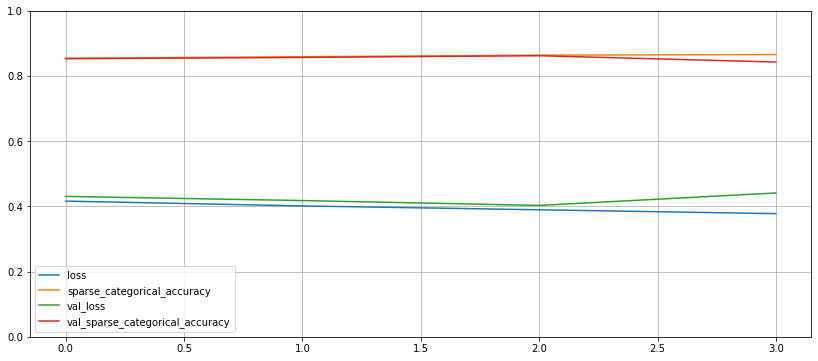

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(14,6))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [47]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 67.1948 - sparse_categorical_accuracy: 0.8234


[67.19475555419922, 0.8234000205993652]

In [53]:
model.predict(x_test[[0]])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)